https://www.kaggle.com/datasets/camnugent/california-housing-prices/data

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.



# Importing Libraries:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib
from sklearn.decomposition import  PCA
from sklearn.cluster import  KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error  
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
#Importing data
df=pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
print('the number of rows and colums are'+str(df.shape))

print('\nthe columns are - \n')
[print(i,end='.\t\n') for i in df.columns.values]

the number of rows and colums are(20640, 10)

the columns are - 

longitude.	
latitude.	
housing_median_age.	
total_rooms.	
total_bedrooms.	
population.	
households.	
median_income.	
median_house_value.	
ocean_proximity.	


[None, None, None, None, None, None, None, None, None, None]

In [4]:
df.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

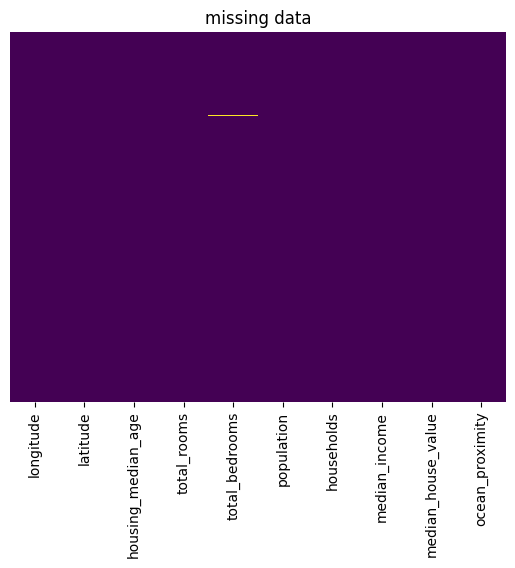

In [5]:
df.isnull().sum()
sns.heatmap(df.isnull(),cmap='viridis',cbar=False,yticklabels=False)

plt.title('missing data')
plt.show()

In [6]:
#statistics of missing values column
df['total_bedrooms'].describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

Statistics for missing value feature

<li>average is 537 for total bedrooms</li>
<li>first quartile is highly low compared to other two</li>

In [7]:
def plot_bedrooms_histogram(dataframe):
    """
    Plot a histogram of the 'total_bedrooms' feature from the provided DataFrame.

    Parameters:
    dataframe (DataFrame): The input DataFrame containing the 'total_bedrooms' data.

    Returns:
    None

    Example:
    plot_bedrooms_histogram(df)
    """
    plt.figure(figsize=(8, 4))
    plt.hist(dataframe[dataframe['total_bedrooms'].notnull()]['total_bedrooms'], bins=20, color='green')
    plt.title('Frequency Histogram of Total Bedrooms')
    plt.xlabel('Total Bedrooms')
    plt.ylabel('Frequency')
    plt.show()

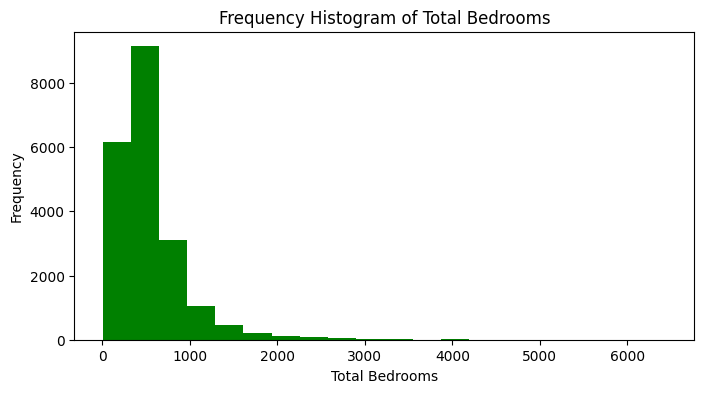

In [8]:
plot_bedrooms_histogram(df)

It shows the frequency of different ranges of total bedrooms in the housing data. The majority of the properties seem to have a relatively low number of bedrooms, as indicated by the peak in the histogram. Additionally, there appear to be some outliers with a very high number of bedrooms, which are likely larger properties or may be erroneous data points. 


In [9]:
def plot_bedrooms_boxplot(dataframe):
    """
    Plot a boxplot of the 'total_bedrooms' feature from the provided DataFrame.

    Parameters:
    dataframe (DataFrame): The input DataFrame containing the 'total_bedrooms' data.

    Returns:
    None

    Example:
    plot_bedrooms_boxplot(df)
    """
    plt.figure(figsize=(10, 5))
    sns.boxplot(y='total_bedrooms', data=dataframe)
    plt.title('Boxplot of Total Bedrooms')
    plt.ylabel('Total Bedrooms')
    plt.show()

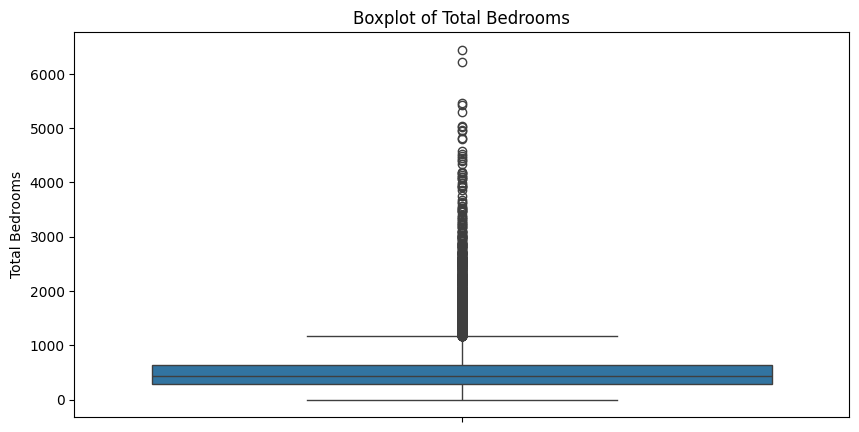

In [10]:
plot_bedrooms_boxplot(df)

The boxplot reveals the presence of outliers, which are data points lying outside the whiskers of the plot. These outliers suggest properties with unusually high numbers of bedrooms compared to the rest of the dataset. 

In [11]:
#we will calculate the median for total_bedrooms based  upon categories of ocean_proximity column
def calc_categorical_median(x):
    """this function fill the missing values of total_bedrooms based upon categories of ocean_proximity"""
    unique_colums_ocean_proximity=x['ocean_proximity'].unique()
    for i in unique_colums_ocean_proximity:
        median=x[x['ocean_proximity']==i]['total_bedrooms'].median()
        x.loc[x['ocean_proximity']==i,'total_bedrooms'] =  x[x['ocean_proximity']==i]['total_bedrooms'].fillna(median)
calc_categorical_median(df)

In [12]:
#checking missing values again
print(df.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [13]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB



This dataset contains 18 columns and 19,673 entries. It appears to be preprocessed and cleaned, as there are no missing values in any of the columns. The dataset consists of both numerical and categorical features. The numerical features include 'longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'income per working population', 'bed per house', and 'h/p'. The categorical features are encoded as dummy variables, such as 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'new', and 'old'. The dataset seems ready for further analysis or modeling tasks.

In [14]:
# Descriptive Information
df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.852229,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.390765,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


 These descriptive statistics reveal the range and distribution of each feature, offering insights into the housing landscape captured by the dataset.







In [15]:
def explore_data(data):
    """
    Explores the dataset by displaying major moments, and basic statistics.

    Parameters:
        data (DataFrame): Input dataset.

    Returns:
        None
    """
    # Display major moments
    moments = pd.DataFrame({
        'Mean': data.mean(),
        'Median': data.median(),
        'Standard Deviation': data.std(),
        'Skewness': data.skew(),
        'Kurtosis': data.kurtosis()
    })
    print("Major Moments:")
    print(moments)
    print("\n")
   
explore_data(df)

Major Moments:
                             Mean       Median  Standard Deviation  Skewness  \
longitude             -119.569704    -118.4900            2.003532 -0.297801   
latitude                35.631861      34.2600            2.135952  0.465953   
housing_median_age      28.639486      29.0000           12.585558  0.060331   
total_rooms           2635.763081    2127.0000         2181.615252  4.147343   
total_bedrooms         536.852229     435.0000          419.390765  3.481072   
population            1425.476744    1166.0000         1132.462122  4.935858   
households             499.539680     409.0000          382.329753  3.410438   
median_income            3.870671       3.5348            1.899822  1.646657   
median_house_value  206855.816909  179700.0000       115395.615874  0.977763   

                     Kurtosis  
longitude           -1.330152  
latitude            -1.117760  
housing_median_age  -0.800629  
total_rooms         32.630927  
total_bedrooms      22.2

C:\Users\CORE COM\AppData\Local\Temp\ipykernel_11604\345234241.py:13: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'Mean': data.mean(),
C:\Users\CORE COM\AppData\Local\Temp\ipykernel_11604\345234241.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'Median': data.median(),
C:\Users\CORE COM\AppData\Local\Temp\ipykernel_11604\345234241.py:15: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated.

The mean longitude and latitude values indicate that the dataset covers a broad geographical area across California. The housing median age, with a slightly positive skewness and low kurtosis, suggests a relatively balanced distribution of housing age, albeit with a slight right skew. However, the total number of rooms, bedrooms, population, and households exhibit significant positive skewness and high kurtosis, indicating heavy-tailed distributions with a concentration of data towards lower values but with some extreme outliers on the higher end. Notably, the median income and median house value distributions demonstrate moderate skewness and kurtosis, suggesting some degree of asymmetry but with less extreme tail behavior compared to other features. 

In [16]:
def plot_house_value_distribution(dataframe):
    """
    Plot the distribution of median house values.

    Parameters:
    dataframe (DataFrame): The input DataFrame containing the data.

    Returns:
    None

    Example:
    plot_house_value_distribution(df)
    """
    plt.figure(figsize=(6, 6))
    sns.distplot(dataframe['median_house_value'], color='purple')
    plt.title('Distribution of Median House Values')
    plt.xlabel('Median House Value')
    plt.ylabel('Frequency')
    plt.show()

C:\Users\CORE COM\AppData\Local\Temp\ipykernel_11604\1769864226.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['median_house_value'], color='purple')


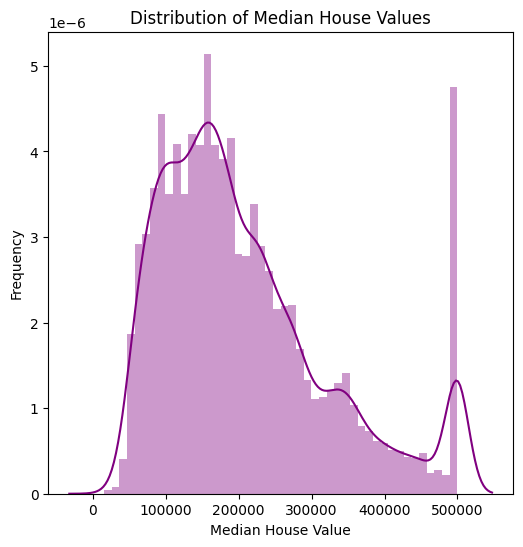

In [17]:
plot_house_value_distribution(df)

Here is a peak in the frequency of median house values around $200,000, indicating a significant concentration of properties with high values. This concentration might represent affluent neighborhoods or areas with luxurious properties.

In [18]:
def plot_population_vs_house_value(dataframe):
    """
    Plot a scatter plot of population versus median house value, with color representing median house value and size representing median income.

    Parameters:
    dataframe (DataFrame): The input DataFrame containing the data.

    Returns:
    None

    Example:
    plot_population_vs_house_value(df)
    """
    plt.figure(figsize=(8,6))
    plt.scatter(dataframe['population'], dataframe['median_house_value'], c=dataframe['median_house_value'], s=dataframe['median_income']*50)
    plt.colorbar()
    plt.title('Population vs House Value')
    plt.xlabel('Population')
    plt.ylabel('House Value')
    plt.show()


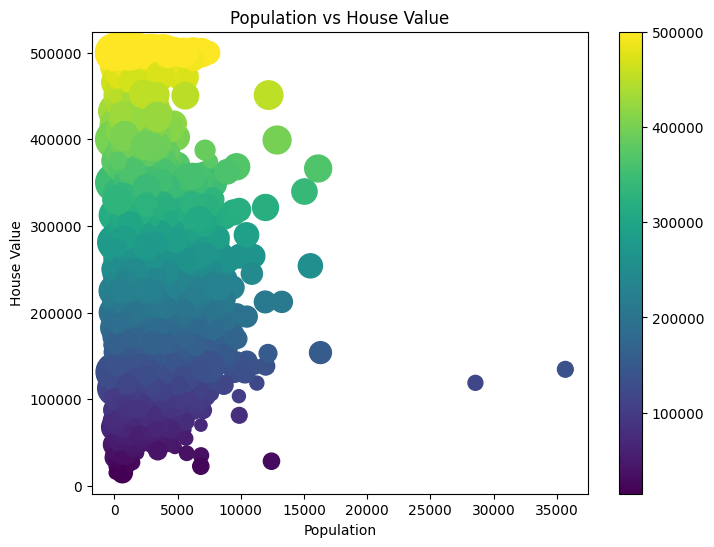

In [19]:
plot_population_vs_house_value(df)

The scatter plot shows the relationship between population and median house value. Each point represents a specific geographical area. The color of the points indicates the median house value, with higher values represented by warmer colors. Additionally, the size of the points corresponds to the median income, where larger points indicate higher median income. From the plot, it appears that areas with higher population densities tend to have a wider range of median house values, with some areas showing significantly higher values. This suggests that population density might be a factor influencing housing prices, possibly due to factors like demand and location attractiveness.

In [20]:
df[df['median_house_value']>450000]['median_house_value'].value_counts().head()


500001.0    965
500000.0     27
475000.0      8
483300.0      6
466700.0      4
Name: median_house_value, dtype: int64

In [21]:
df=df.loc[df['median_house_value']<500001,:]


In [22]:
df=df[df['population']<25000]


C:\Users\CORE COM\AppData\Local\Temp\ipykernel_11604\1983528165.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['median_house_value'])


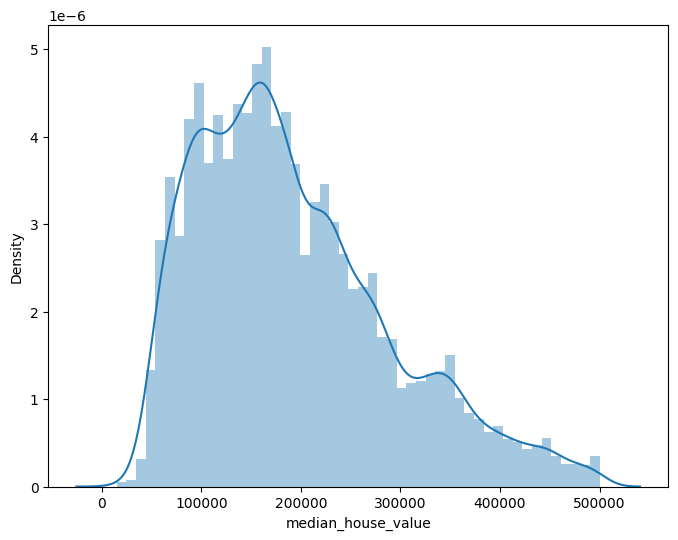

In [23]:
plt.figure(figsize=(8,6))
sns.distplot(df['median_house_value'])
plt.show()

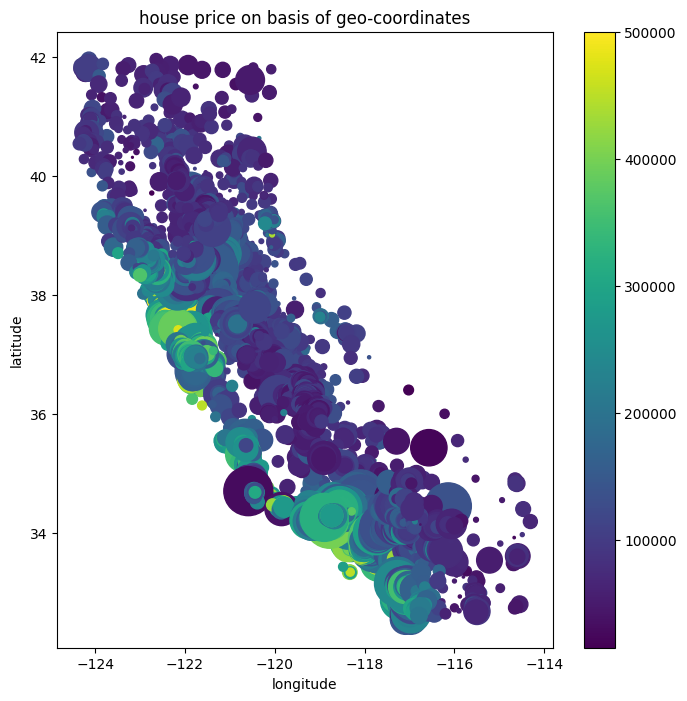

In [24]:
plt.figure(figsize=(8,8))
plt.scatter(df['longitude'],df['latitude'],c=df['median_house_value'],s=df['population']/10,cmap='viridis')
plt.colorbar()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('house price on basis of geo-coordinates')
plt.show()

C:\Users\CORE COM\AppData\Local\Temp\ipykernel_11604\3825379278.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cbar=False,annot=True,data=df.corr(),cmap='coolwarm')


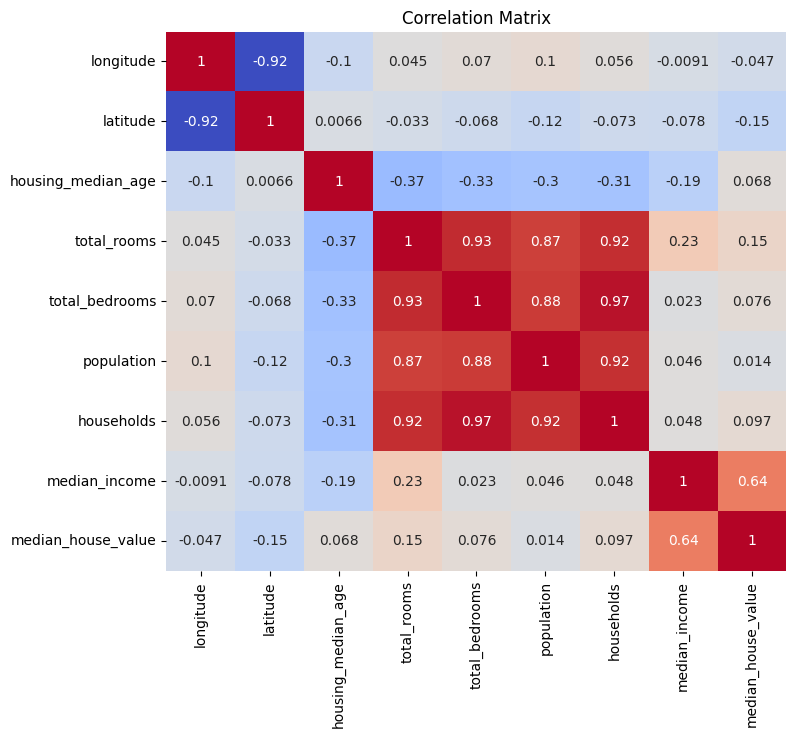

In [25]:
#corelation matrix
plt.figure(figsize=(8,7))
sns.heatmap(cbar=False,annot=True,data=df.corr(),cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

[]

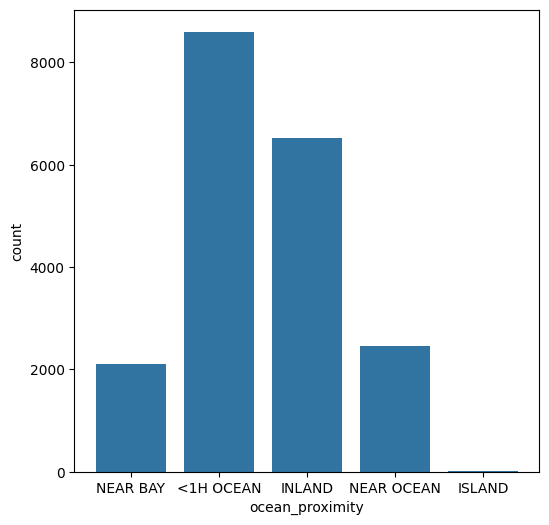

In [26]:
#barplot on ocean_proximity categories
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='ocean_proximity')
plt.plot()

C:\Users\CORE COM\AppData\Local\Temp\ipykernel_11604\2573375065.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='ocean_proximity',y='median_house_value',palette='viridis')


[]

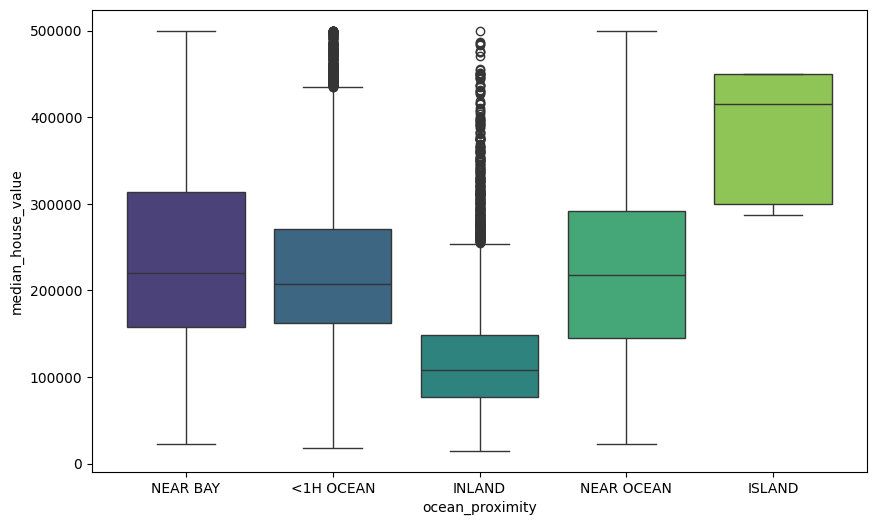

In [27]:
#boxplot of house value on ocean_proximity categories
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='ocean_proximity',y='median_house_value',palette='viridis')
plt.plot()

# Data Preprocessing:

In [28]:
# converting ocean_proximity to dummies
df=pd.concat([pd.get_dummies(df['ocean_proximity'],drop_first=True),df],axis=1).drop('ocean_proximity',axis=1)
df['income per working population']=df['median_income']/(df['population']-df['households'])
df['bed per house']=df['total_bedrooms']/df['total_rooms']
df['h/p']=df['households']/df['population']

In [29]:
def type_building(x):
    if x<=10:
        return "new"
    elif x<=30:
        return 'mid old'
    else:
        return 'old'
df=pd.concat([df,pd.get_dummies(df['housing_median_age'].apply(type_building),drop_first=True)],axis=1)

In [30]:
x=df.drop('median_house_value',axis=1).values
y=df['median_house_value'].values

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [32]:
ms=MinMaxScaler()
xtrain=ms.fit_transform(xtrain)
xtest=ms.transform(xtest)

In [33]:
def c_variance(x):
    total=0
    clist=[]
    for i in np.arange(0,xtrain.shape[1]):
        p=PCA(n_components=i+1)
        p.fit(x)
        total=total+p.explained_variance_ratio_[i]
        clist.append(total)
        
    return clist
x_train_variance=list(map(lambda x:x*100,c_variance(xtrain)))

Text(0.5, 1.0, 'comulative variance ratio of p.c.a components')

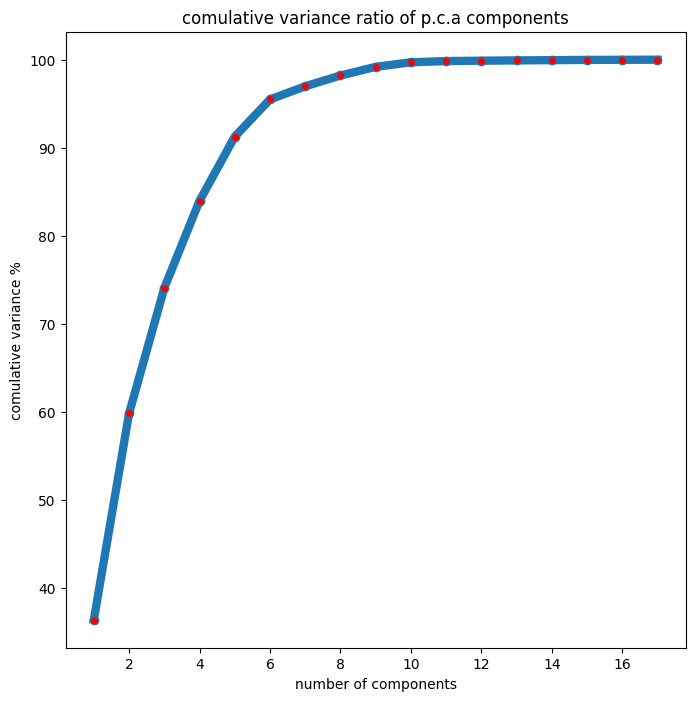

In [34]:
plt.figure(figsize=(8,8))
plt.plot(np.arange(1,xtrain.shape[1]+1),x_train_variance,marker='o',markerfacecolor='red',lw=6)
plt.xlabel('number of components')
plt.ylabel('comulative variance %')
plt.title('comulative variance ratio of p.c.a components')

# Clustering:

In [35]:
def plot_elbow_curve(xtrain):
    """
    Plot the elbow curve to determine the optimal number of clusters using the Within-Cluster Sum of Squares (WSS) method.

    Parameters:
    xtrain (array-like): The training data.

    Returns:
    None

    Example:
    plot_elbow_curve(xtrain)
    """
    wss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(xtrain)
        wss.append(kmeans.inertia_)

    plt.figure(figsize=(6,6))
    plt.plot(np.arange(1, 11), wss, marker='X', markerfacecolor='orange', markersize=10, lw=5, color='purple')
    plt.title('Elbow Curve')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Within-Cluster Sum of Squares (WSS)')
    plt.show()


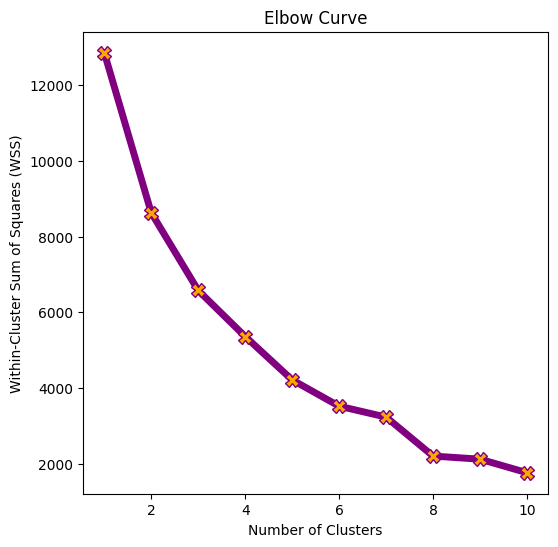

In [36]:
plot_elbow_curve(xtrain)

The elbow curve helps determine the optimal number of clusters by plotting the Within-Cluster Sum of Squares (WSS) against the number of clusters. In this plot, the 'elbow' point represents the optimal number of clusters, where adding more clusters does not significantly decrease the WSS. From the curve, it appears that the WSS decreases sharply until reaching 3 clusters, after which the rate of decrease slows down. Therefore, 3 clusters seems to be the most optimal choice for partitioning the data.

In [37]:
def perform_kmeans_clustering(dataframe, n_clusters=3):
    """
    Perform K-means clustering on the provided data and assign cluster labels.

    Parameters:
    dataframe (DataFrame): The input DataFrame containing the data.
    n_clusters (int): The number of clusters to form. Default is 3.

    Returns:
    DataFrame: The input DataFrame with an additional 'Cluster' column containing the cluster labels.
    """
    # Selecting features for clustering
    X = dataframe[['longitude', 'latitude', 'median_income', 'median_house_value']]

    # Standardizing the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Performing K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    dataframe['Cluster'] = kmeans.fit_predict(X_scaled)

    return dataframe

In [38]:
df1 = perform_kmeans_clustering(df)

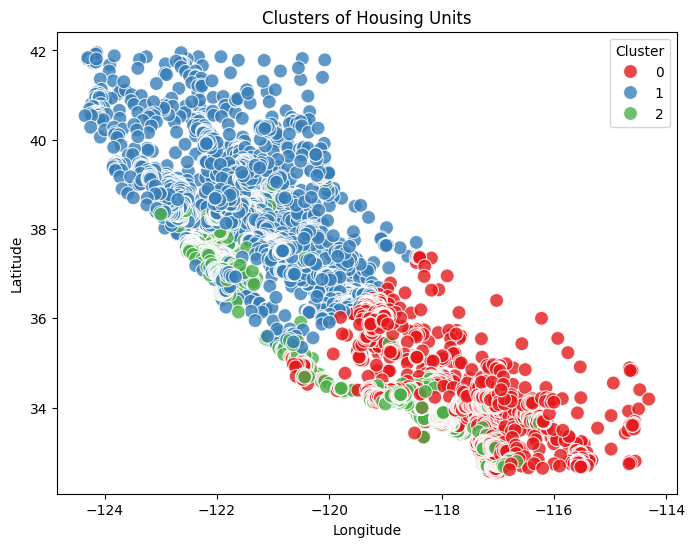

In [39]:
# Visualizing the clusters
def visualize_clusters(dataframe):
    """
    Visualize the clusters of housing units based on location, median income, and median house value.

    Parameters:
    dataframe (DataFrame): The input DataFrame containing the cluster labels.

    Returns:
    None
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='longitude', y='latitude', hue='Cluster', data=dataframe, palette='Set1', s=100, alpha=0.8)
    plt.title('Clusters of Housing Units')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend(title='Cluster')
    plt.show()

visualize_clusters(df1)

The visualization of clusters of housing units based on location (longitude and latitude) reveals the spatial distribution of the clusters. Each data point represents a housing unit, and the color of the point indicates the cluster to which the housing unit belongs.
The size of the clusters, indicated by the density of data points, provides insights into the relative prevalence of different types of housing units in different geographic areas.



# Linear Regression:

In [40]:
def regressor_model(x, y, estimator):
    """
    Train a regression model using the given features and target variable.

    Parameters:
    x (array-like): The features used for training the model.
    y (array-like): The target variable to be predicted.
    estimator (Estimator): The regression estimator to be used.

    Returns:
    Estimator: The trained regression model.

    """
    regressor = estimator()
    regressor.fit(x, y)
    lr_rmse = np.sqrt(mean_squared_error(y, regressor.predict(x)))
    cv_regressor = cross_val_score(cv=10, X=x, y=y, estimator=regressor, scoring='r2')
    print('The cross validated accuracy  - ' + str(100 * cv_regressor.mean()))
    print('The cross validated variance is - ' + str(100 * cv_regressor.std()))
    return regressor


estimator = LinearRegression

# Train your regression model
trained_model = regressor_model(x, y, estimator)

The cross validated accuracy  - 49.43621337895245
The cross validated variance is - 9.230889591780915


In [44]:
def evaluate(ypred, ytest, regressor):
    """
    Evaluate the performance of a regression model by plotting the residual plot and calculating the root mean squared error.

    Parameters:
    ypred (array-like): The predicted values.
    ytest (array-like): The actual values.
    regressor (Estimator): The trained regression model.

    Returns:
    None
    """
    plt.figure(figsize=(6, 6))
    plt.xlabel('(ytest) - (ypred)')
    plt.ylabel('Frequency')
    plt.title('Residual Plot')
    plt.hist(ytest - ypred)
    print("Root Mean Squared Error for test data: " + str(np.sqrt(mean_squared_error(ytest, ypred))))
    plt.show()

Linear regression with most correlated features
The cross validated accuracy  - 41.3506511798424
The cross validated variance is - 1.9235500099556033
Root Mean Squared Error for test data: 76318.44298565741


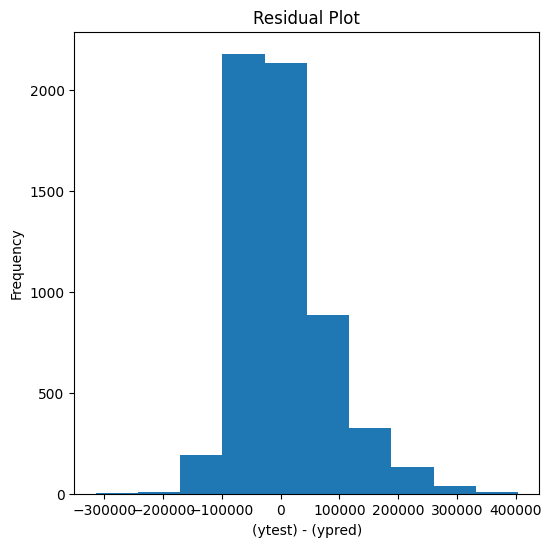

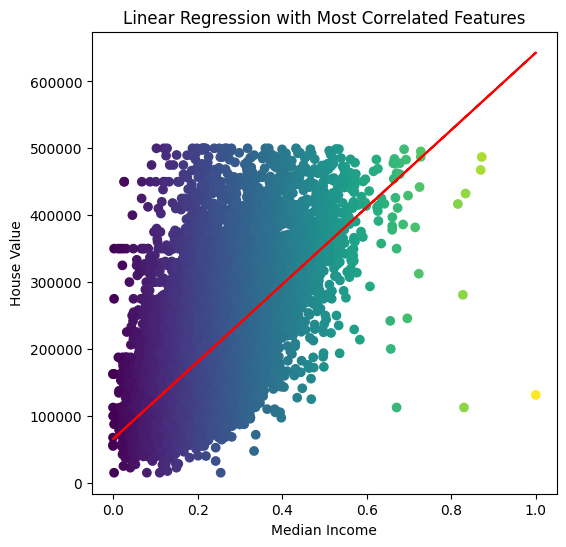

In [45]:
def visualize_linear_regression(x_train, y_train, x_test, y_test, regressor):
    """
    Visualize the linear regression model with most correlated features.

    Parameters:
    x_train (array-like): The training features.
    y_train (array-like): The training target variable.
    x_test (array-like): The testing features.
    y_test (array-like): The testing target variable.
    regressor (estimator): The trained linear regression model.

    Returns:
    None
    """
    print('Linear regression with most correlated features')
    l = regressor_model(x_train[:, [11]], y_train, LinearRegression)
    evaluate(l.predict(x_test[:, [11]]), y_test, l)
    plt.figure(figsize=(6, 6))
    plt.scatter(x_train[:, 11], y_train, c=x_train[:, 11])
    plt.plot(x_train[:, 11], l.predict(x_train[:, 11:12]), color='red')
    plt.xlabel('Median Income')
    plt.ylabel('House Value')
    plt.title('Linear Regression with Most Correlated Features')
    plt.show()

visualize_linear_regression(xtrain, ytrain, xtest, ytest, trained_model)

The root mean squared error for the test data is 76318.44, indicating the average difference between the predicted and actual house values. The residual plot shows the distribution of errors, providing insights into the model's performance across different house values.

The scatter plot illustrates the positive relationship between median income and house value, with the regression line depicted in red. This visualization aids in comprehending how effectively the linear regression model captures the association between median income and house value. As median income increases, there is a corresponding rise in house value, demonstrating a clear positive correlation between these variables.





